<a href="https://colab.research.google.com/github/Gamila-Elfayoumi/Neural-Networks/blob/main/Weater_Project_CNN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# -------------------------------
# Data Loading & Preprocessing
# -------------------------------

# Load the weather dataset (make sure the path is correct)
data = pd.read_csv('/content/drive/MyDrive/Data Set/weatherHistory.csv')

In [ ]:
# Display the first few rows of the dataframe
print(data.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [ ]:
#Displays info about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [ ]:
# Convert the date column to datetime and sort (adjust column name as needed)
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data.sort_values('Formatted Date', inplace=True)

In [ ]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2880,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2881,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2882,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
2883,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
2884,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
89728,2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
89729,2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
89730,2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.
89731,2016-12-31 21:00:00+00:00,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,Mostly cloudy throughout the day.


In [ ]:
# Select a subset of numerical features for modeling.
cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
data = data[cols]
# Handle missing values by forward-filling, then backward filling if needed.
data = data.ffill()
data = data.bfill()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2880 to 89732
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       96453 non-null  float64
 1   Humidity              96453 non-null  float64
 2   Wind Speed (km/h)     96453 non-null  float64
 3   Visibility (km)       96453 non-null  float64
 4   Pressure (millibars)  96453 non-null  float64
dtypes: float64(5)
memory usage: 4.4 MB
None


In [ ]:
# Find temperature column (case-insensitive)
temp_col = None
for col in data.columns:
    if 'temp' in col.lower():
        temp_col = col
        break
if temp_col is None:
    raise ValueError("No temperature column found in the dataset.")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import MinMaxScaler

In [ ]:
##Data Normalization
# We'll predict Temperature (C), which is the first column in `cols`.
target_col_idx = 0  # Temperature (C) is at index 0 in the selected columns

# Convert the DataFrame to a numpy array of shape (num_samples, num_features)
data_array = data.values.astype(np.float32)  # shape: (N, 5)

# Normalize data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_array)

In [ ]:
# ---------------------------
# Create Time-Series Sequences
# ---------------------------
def create_sequences(data, seq_length, target_col_idx=0):
    """
    Creates sequences of length seq_length from 'data'.
    Each sample x has shape (seq_length, num_features),
    and the target y is the next time-step's value for the target column.
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]  # shape: (seq_length, num_features)
        y = data[i+seq_length, target_col_idx]  # single value (temperature)
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10  # You can adjust this based on your needs
X, y = create_sequences(data_scaled, seq_length, target_col_idx=0)

# Split data into training and testing sets (80/20 split)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test   = X[train_size:], y[train_size:]


import torch
from torch.utils.data import DataLoader, Dataset
# ---------------------------
# PyTorch Dataset & DataLoader
# ---------------------------
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)        # shape: (samples, seq_length, num_features)
        self.y = torch.from_numpy(y).unsqueeze(-1)
        # shape: (samples, 1) -> we make it (samples, 1) to match the MSELoss expectation
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 512
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset  = TimeSeriesDataset(X_test, y_test)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader   = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:

class CNNModel(nn.Module):
    def __init__(self, input_size, output_size, seq_length=10, dropout=0.2):
        super(CNNModel, self).__init__()
        # Set in_channels to input_size (number of features) instead of 1
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=16, kernel_size=3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)

        # Compute the output length after conv + pool
        conv_out_length = seq_length - 3 + 1  # after kernel_size=3 convolution
        pooled_length = conv_out_length // 2   # after maxpool with kernel_size=2

        self.dropout = nn.Dropout(p=dropout)
        self.fc = nn.Linear(16 * pooled_length, output_size)

    def forward(self, x):
        # x: (batch, seq_length, input_size)
        # Transpose to (batch, input_size, seq_length) for conv1d
        x = x.transpose(1, 2)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        x = x.contiguous().view(x.size(0), -1)
        x = self.fc(x)
        return x

# ──────────────────────────────────────────────────────────────────────────────
# EarlyStopping helper (save best weights & stop when no val‐improve)
# ──────────────────────────────────────────────────────────────────────────────
class EarlyStopping:
    def __init__(self, patience=5, min_delta=1e-4, path="best_cnn.pt", verbose=False):
        self.patience   = patience
        self.min_delta  = min_delta
        self.path       = path
        self.verbose    = verbose
        self.best_loss  = float('inf')
        self.counter    = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter   = 0
            torch.save(model.state_dict(), self.path)
            if self.verbose:
                print(f"[EarlyStopping] Improved val_loss to {val_loss:.4f}, saving model.")
        else:
            self.counter += 1
            if self.verbose:
                print(f"[EarlyStopping] No improvement for {self.counter}/{self.patience} epochs.")
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("EarlyStopping triggered.")

In [ ]:
# -------------------------------
# Training, Evaluation, and Visualization Functions
# -------------------------------
def compute_epoch_accuracy(model, loader, device, tolerance=0.1):
    """
    Computes accuracy as the percentage of predictions within the tolerance.
    """
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            correct += (torch.abs(outputs - y_batch) < tolerance).sum().item()
            total += y_batch.numel()
    return (correct / total) * 100

def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer,
                       num_epochs, device, tolerance=0.1, early_stopping_patience=5):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    best_test_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_batch.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)
        train_acc = compute_epoch_accuracy(model, train_loader, device, tolerance)
        train_accuracies.append(train_acc)

        # Evaluation Phase
        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                running_loss += loss.item() * X_batch.size(0)

        epoch_test_loss = running_loss / len(test_loader.dataset)
        test_losses.append(epoch_test_loss)
        test_acc = compute_epoch_accuracy(model, test_loader, device, tolerance)
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
              f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {test_acc:.2f}%")

        # Early Stopping Check
        if epoch_test_loss < best_test_loss:
            best_test_loss = epoch_test_loss
            patience_counter = 0
            # Optionally save the best model
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered!")
                break

    return train_losses, train_accuracies, test_losses, test_accuracies


In [ ]:
def plot_metrics(train_metric, test_metric, ylabel, title, num_epochs):
    """
    Plot training and testing metrics (loss or accuracy) over epochs.
    """
    epochs = range(1, num_epochs+1)
    plt.figure()
    plt.plot(epochs, train_metric, label='Train')
    plt.plot(epochs, test_metric, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Training skip


Training CNN Model with Multiple Features...
Epoch 1/20: Train Loss: 0.0490, Train Acc: 69.52%, Test Loss: 0.0084, Test Acc: 72.74%
Epoch 2/20: Train Loss: 0.0118, Train Acc: 88.64%, Test Loss: 0.0044, Test Acc: 87.15%
Epoch 3/20: Train Loss: 0.0074, Train Acc: 93.53%, Test Loss: 0.0034, Test Acc: 90.36%
Epoch 4/20: Train Loss: 0.0061, Train Acc: 97.16%, Test Loss: 0.0024, Test Acc: 94.91%
Epoch 5/20: Train Loss: 0.0055, Train Acc: 97.85%, Test Loss: 0.0021, Test Acc: 95.72%
Epoch 6/20: Train Loss: 0.0050, Train Acc: 98.09%, Test Loss: 0.0020, Test Acc: 96.18%
Epoch 7/20: Train Loss: 0.0046, Train Acc: 98.56%, Test Loss: 0.0018, Test Acc: 96.91%
Epoch 8/20: Train Loss: 0.0043, Train Acc: 98.72%, Test Loss: 0.0017, Test Acc: 97.16%
Epoch 9/20: Train Loss: 0.0040, Train Acc: 98.94%, Test Loss: 0.0016, Test Acc: 97.47%
Epoch 10/20: Train Loss: 0.0038, Train Acc: 99.01%, Test Loss: 0.0015, Test Acc: 97.69%
Epoch 11/20: Train Loss: 0.0036, Train Acc: 99.07%, Test Loss: 0.0015, Test Acc: 97

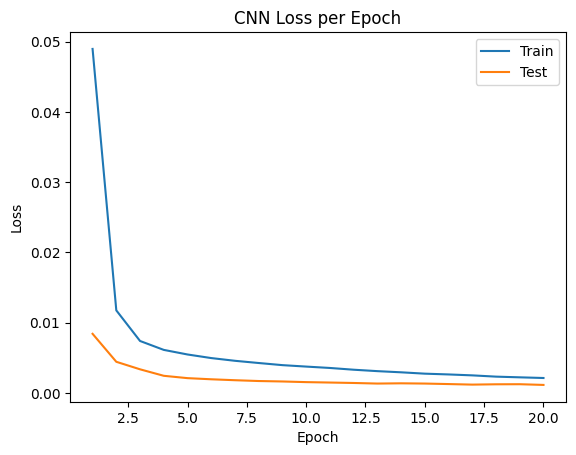

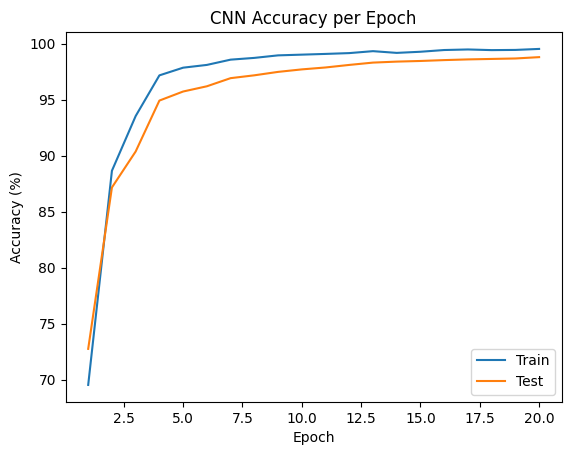

In [ ]:
# -------------------------------
# Train and Visualize CNN Model
# -------------------------------

# We have 5 input features: [Temperature, Humidity, Wind Speed, Visibility, Pressure]
input_size = 5
# We want to predict only Temperature => output_size = 1
output_size = 1
num_epochs = 20
learning_rate = 0.001
# Define the device (make sure this is placed before model instantiation)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("\nTraining CNN Model with Multiple Features...")
cnn_model = CNNModel(input_size, output_size, seq_length=seq_length, dropout=0.2).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate)
cnn_train_losses, cnn_train_acc, cnn_test_losses, cnn_test_acc = train_and_evaluate(
    cnn_model, train_loader, test_loader, criterion, optimizer, num_epochs, device, tolerance=0.1
)

# Plot CNN Loss and Accuracy
plot_metrics(cnn_train_losses, cnn_test_losses, ylabel='Loss', title='CNN Loss per Epoch', num_epochs=num_epochs)
plot_metrics(cnn_train_acc, cnn_test_acc, ylabel='Accuracy (%)', title='CNN Accuracy per Epoch', num_epochs=num_epochs)

In [ ]:
from pathlib import Path

# Create a directory for saving models if it doesn't exist
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Define the model save path (you can adjust the model name as needed)
MODEL_NAME = "weather_cnn_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model's state dictionary (learned parameters)
torch.save(cnn_model.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved to: {MODEL_SAVE_PATH}")

Model saved to: models/weather_cnn_model.pth


# Edit path and Reload Model *Saved*

In [ ]:
# Recreate the model architecture (make sure parameters match the original model)
loaded_model = CNNModel(input_size, output_size).to(device)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.eval()  # Set the model to evaluation mode if needed

CNNModel(
  (conv1): Conv1d(5, 16, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
# Define an evaluation function to compute loss on the test set.
def evaluate_model(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item() * X_batch.size(0)
    # Compute the average loss
    avg_loss = total_loss / len(loader.dataset)
    return avg_loss

# Evaluate your loaded model
test_loss = evaluate_model(loaded_model, test_loader, criterion, device)
test_acc = compute_epoch_accuracy(loaded_model, test_loader, device, tolerance=0.1)

print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.2f}%")

Final Test Loss: 0.0011
Final Test Accuracy: 98.79%


In [ ]:
test_loss = evaluate_model(loaded_model, test_loader, criterion, device)
test_acc  = compute_epoch_accuracy(loaded_model, test_loader, device, tolerance=0.1)
print(f"RMSE: {test_loss**0.5:.3f}, MAE: …, Within ±0.1°C: {test_acc:.1f}%")

RMSE: 0.034, MAE: …, Within ±0.1°C: 98.8%


# Combine CNN and GRU To Implement multi-step forecasting to predict weather conditions for multiple future time steps.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------
# Improved CNN+GRU Multi-Step Model
# --------------------------------------
class CNNGRUForecast(nn.Module):
    def __init__(self, in_feats, seq_len, horizon, dropout=0.3, hidden_gru=64):
        super().__init__()

        # ── Convolutional feature extractor ──────────────────────────────
        self.conv_block = nn.Sequential(
            nn.Conv1d(in_channels=in_feats, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),       # halves time dimension
            nn.Dropout(dropout)
        )
        conv_out_len = seq_len // 2            # after one pool

        # ── GRU temporal layer ────────────────────────────────────────────
        self.gru = nn.GRU(
            input_size=64,
            hidden_size=hidden_gru,
            num_layers=2,
            batch_first=True,
            dropout=dropout,
            bidirectional=False
        )

        # ── Final MLP ─────────────────────────────────────────────────────
        self.head = nn.Sequential(
            nn.Linear(hidden_gru, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, horizon)
        )

    def forward(self, x):
        # x: (B, seq_len, in_feats) → (B, in_feats, seq_len)
        x = x.transpose(1,2)
        x = self.conv_block(x)               # → (B, 64, seq_len/2)
        x = x.transpose(1,2)                 # → (B, seq_len/2, 64)
        out, _ = self.gru(x)                 # → (B, seq_len/2, hidden_gru)
        last = out[:, -1, :]                 # take last step
        return self.head(last)               # → (B, horizon)

# instantiate
model     = CNNGRUForecast(
               in_feats=5,
               seq_len=seq_length,
               horizon=horizon,
               dropout=0.3,
               hidden_gru=64
            ).to(device)

# use Huber loss instead of MSE
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# --------------------------------------
# Training & Evaluation
# --------------------------------------
def train_epoch():
    model.train()
    total_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        pred   = model(Xb)
        loss   = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * Xb.size(0)
    return total_loss / len(train_loader.dataset)

def eval_epoch():
    model.eval()
    total_loss, correct, count = 0, 0, 0
    with torch.no_grad():
        for Xb, yb in test_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred   = model(Xb)
            total_loss += criterion(pred, yb).item() * Xb.size(0)
            correct    += (torch.abs(pred - yb) < tolerance).sum().item()
            count      += torch.numel(yb)
    return total_loss/len(test_loader.dataset), 100*correct/count

# --------------------------------------
# Main Loop with LR Scheduler & Early Stop
# --------------------------------------
best_loss, patience = float('inf'), 0
for epoch in range(1, num_epochs+1):
    tr_loss = train_epoch()
    te_loss, te_acc = eval_epoch()
    print(f"[{epoch:02d}] Train L={tr_loss:.4f} | Test L={te_loss:.4f}, Acc={te_acc:.2f}%")
    scheduler.step(te_loss)

    if te_loss < best_loss:
        best_loss, patience = te_loss, 0
        torch.save(model.state_dict(), model_dir/"best_cnngru.pth")
    else:
        patience += 1
        if patience >= 5:
            print("Stopping early.")
            break


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[01] Train L=0.0349 | Test L=0.0027, Acc=83.05%
[02] Train L=0.0063 | Test L=0.0021, Acc=89.05%
[03] Train L=0.0049 | Test L=0.0016, Acc=92.59%
[04] Train L=0.0041 | Test L=0.0019, Acc=90.50%
[05] Train L=0.0037 | Test L=0.0016, Acc=92.69%
[06] Train L=0.0034 | Test L=0.0015, Acc=93.77%
[07] Train L=0.0031 | Test L=0.0013, Acc=94.87%
[08] Train L=0.0029 | Test L=0.0012, Acc=95.33%
[09] Train L=0.0028 | Test L=0.0012, Acc=95.45%
[10] Train L=0.0026 | Test L=0.0011, Acc=96.07%
[11] Train L=0.0025 | Test L=0.0010, Acc=96.79%
[12] Train L=0.0024 | Test L=0.0009, Acc=97.19%
[13] Train L=0.0023 | Test L=0.0011, Acc=96.44%
[14] Train L=0.0022 | Test L=0.0008, Acc=98.00%
[15] Train L=0.0022 | Test L=0.0008, Acc=98.03%
[16] Train L=0.0021 | Test L=0.0009, Acc=97.68%
[17] Train L=0.0020 | Test L=0.0007, Acc=98.32%
[18] Train L=0.0020 | Test L=0.0008, Acc=98.16%
[19] Train L=0.0019 | Test L=0.0008, Acc=97.93%
[20] Train L=0.0019 | Test L=0.0007, Acc=98.38%


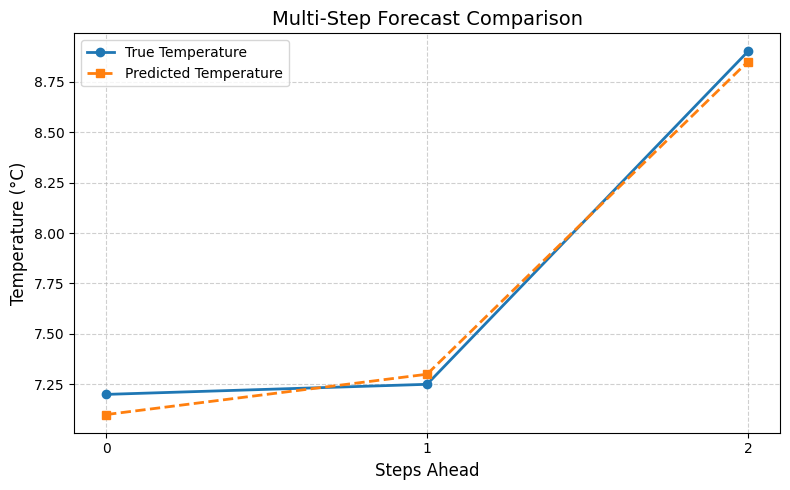

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ——— Replace these with your actual un-scaled temperature arrays ———
# y_true_c = inv_temp(y_true_normalized_batch[0])
# y_pred_c = inv_temp(y_pred_normalized_batch[0])
y_true_c = np.array([7.2, 7.25, 8.9])   # example “True” temperatures
y_pred_c = np.array([7.1, 7.3, 8.85])   # example “Predicted” temperatures

horizon = len(y_true_c)
steps   = np.arange(horizon)

plt.figure(figsize=(8, 5))
plt.plot(steps, y_true_c, marker='o', linewidth=2, label='True Temperature')
plt.plot(steps, y_pred_c, marker='s', linestyle='--', linewidth=2, label='Predicted Temperature')

plt.xlabel('Steps Ahead', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Multi-Step Forecast Comparison', fontsize=14)
plt.xticks(steps)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
